In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
import warnings;
warnings.filterwarnings('ignore');

In [2]:
df_wine = pd.read_csv("QualityPrediction.csv")  # to read the csv file using pandas

In [3]:
df = df_wine.copy()  # to make a copy of dataframe

In [4]:
df.info() # to see the information related to the dataset and observed no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis( Data Visualization using Seaborn and Matplotlib)

In [7]:
df['quality'].unique() # the target variable quality has unique categories of 3,4,5,6,7,8

array([5, 6, 7, 4, 8, 3], dtype=int64)

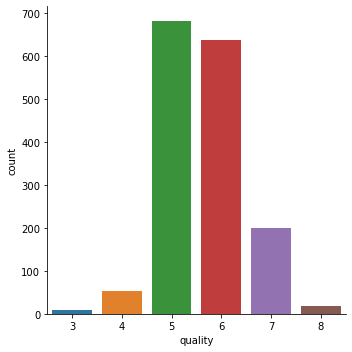

In [8]:
# The target variable 'quality' has high number of values in catagories 5,6 & 7 and lower 
# number of values in catagories 3,4,8.
sns.catplot(x ='quality', data = df, kind='count')

In [9]:
df['quality'].value_counts()/len(df['quality']) # Shows that the categorical data is unbalanced

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

<AxesSubplot:>

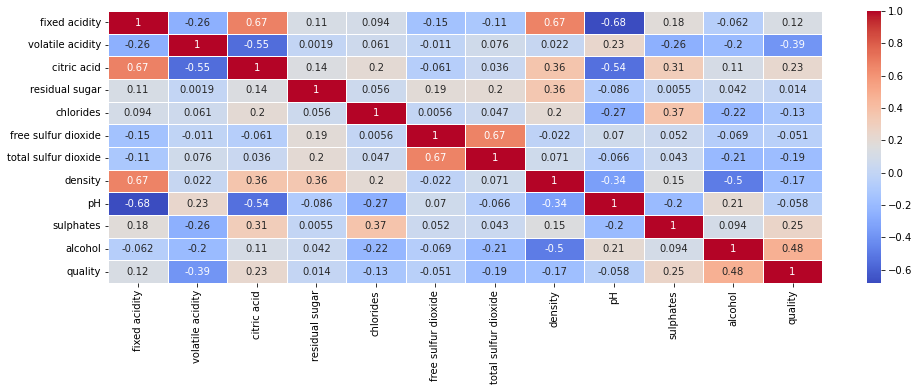

In [10]:
# From the heatmap it is observed that fixed acidity and density are positive moderately
# correlated with co-efficent of 0.67
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm",linewidths=1)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

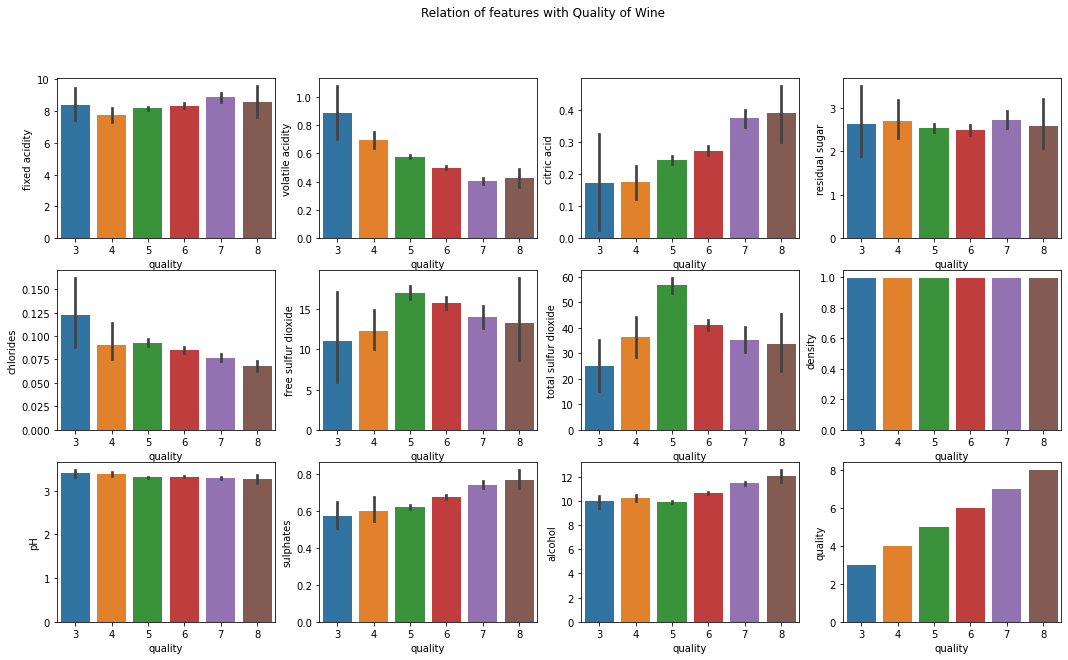

In [12]:
# The observations from the subplots are as follows
#1. Fixed acidity is not related to the quality of wine.
#2. Volatile acidity is inversely related to quality, higher the  quality, lower 
# the volatile acidity.
#3. Citric acidity and quality are directly related, higher the quality, higher the 
# citric acid composition.
#4. Residual Sugar composition is almost same irrespective of wine quality.
#5. Composition of chloride is less in higher quality wines.
#6. Density and pH value is almost same irrespective of wine quality.
#7. Sulphates and alcohol composition goes higher with increase in quality of wine.
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Relation of features with Quality of Wine')
for i in range(0,3):
    for j in range(0,4):
        sns.barplot(ax=axes[i, j], data = df, x = 'quality', y = f[i,j])
        


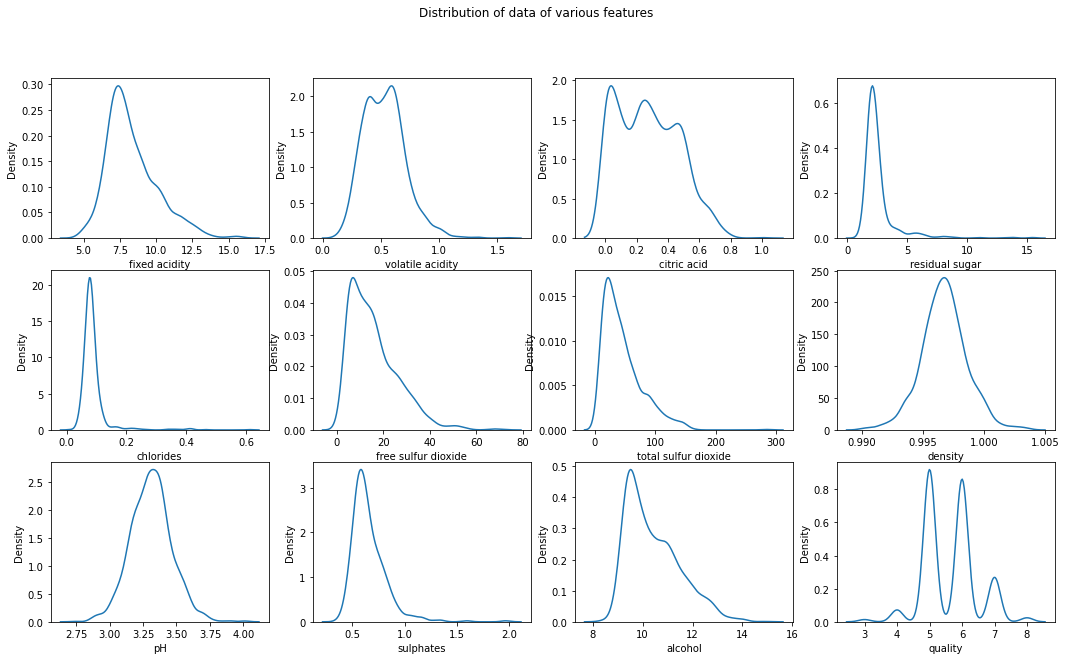

In [13]:
# Except density and pH, all the features of the dataset are right skewed
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Distribution of data of various features')
for i in range(0,3):
    for j in range(0,4):
        sns.kdeplot(ax=axes[i, j], data = df, x = f[i,j] )
        

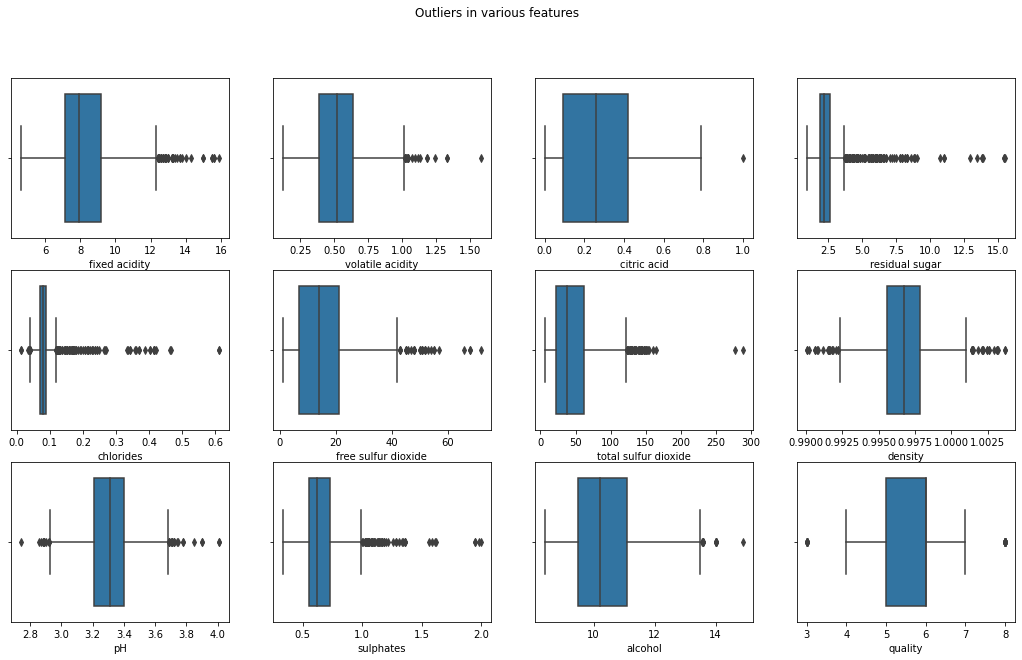

In [14]:
# All the features of the dataset has outliers
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Outliers in various features')
for i in range(0,3):
    for j in range(0,4):
        sns.boxplot(ax=axes[i, j], data = df, x = f[i,j] )

# 2. Data preprocessing

In [16]:
# The wine with ranking less than 6 considered as low quality wine designated with 
#'0' and ranking more than  6 considered as high quality wine designated with '1'. 
#The categorical target data quality encoded with '0' and '1's using mapping function
df['quality'] = df['quality'].map({3:0,4:0,5:0,6:0,7:1,8:1})
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot:xlabel='quality', ylabel='count'>

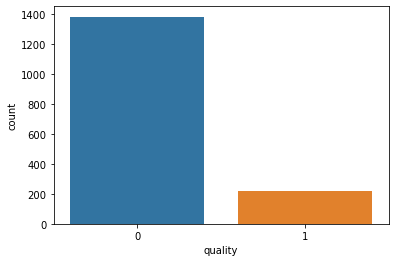

In [17]:
sns.countplot(df['quality'])

In [18]:
# From the boxplot of EDA part, it is observed that, almost all the features of 
# data are right skewed, hence using #RobustScaler() preprocessing method for
# feature scaling
df.columns
X = df.drop('quality',axis=1).values 
scaler = RobustScaler()
df_scale= pd.DataFrame(scaler.fit_transform(X), columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])   
df_scale


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.2500
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.2500
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.2500
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000
...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.809524,0.32,-0.545455,-0.285714,0.55,1.285714,0.150,-0.827740,0.736842,-0.222222,0.1875
1595,-0.952381,0.12,-0.484848,0.000000,-0.85,1.785714,0.325,-0.729306,1.105263,0.777778,0.6250
1596,-0.761905,-0.04,-0.393939,0.142857,-0.15,1.071429,0.050,-0.451902,0.578947,0.722222,0.5000
1597,-0.952381,0.50,-0.424242,-0.285714,-0.20,1.285714,0.150,-0.572707,1.368421,0.500000,0.0000


In [19]:
# Since more features are involved in the dataset, using VIF to evaluate 
# multicollinearity. Fixed acidity and density are 
# multicollinear with respect to other features in the dataset as the VIF > 5. 
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scale.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_scale.values, i)
                          for i in range(len(df_scale.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
  
print(vif_data)

                 Feature       VIF
0          fixed acidity  5.711998
7                density  5.250172
10               alcohol  3.088076
2            citric acid  2.991682
8                     pH  2.789818
6   total sulfur dioxide  2.148662
5    free sulfur dioxide  2.012653
1       volatile acidity  1.792550
3         residual sugar  1.611141
9              sulphates  1.454095
4              chlorides  1.442854


In [21]:
df_scale['quality_en']=df['quality'].values
df_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_en
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000,0
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.2500,0
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.2500,0
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.2500,0
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.809524,0.32,-0.545455,-0.285714,0.55,1.285714,0.150,-0.827740,0.736842,-0.222222,0.1875,0
1595,-0.952381,0.12,-0.484848,0.000000,-0.85,1.785714,0.325,-0.729306,1.105263,0.777778,0.6250,0
1596,-0.761905,-0.04,-0.393939,0.142857,-0.15,1.071429,0.050,-0.451902,0.578947,0.722222,0.5000,0
1597,-0.952381,0.50,-0.424242,-0.285714,-0.20,1.285714,0.150,-0.572707,1.368421,0.500000,0.0000,0


# Prediction using various ML models for binary classification.

As the target variable is available in the dataset, I am using supervised ML models
to predict the output and target variable is categorical data, i am using classification 
models such linear regression, Decision tree, Random forest, KNN, Naive Bayes and 
Support Vector Machine learning models for prediction. As scaling is not required 
for Decision tree,NB and Random forest models, so using unscaled data for prediction. 
For remaining all the models except Decision,NB and Random forest, I am using scaled 
data for prediction( Scaled data is represented with X and Y), unscaled data represented with x and y.

# 1. Logistic Regression ML model

 Logistic Regression ML model is distance based model, using scaled data into the model for prediction

In [23]:
X = df_scale.drop('quality_en',axis=1).values

In [24]:
Y = df_scale['quality_en'].values

In [25]:
# X_train, X_test represents scaled data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

In [26]:
# instanstiation of LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,Y_train) 
print(log_reg.fit(X_train,Y_train))

LogisticRegression(random_state=0)


In [27]:
Y_pred_LR=log_reg.predict(X_test)

In [28]:
# the confusion matrix shows the same format everytime: (TN , FP, FN , TP) with actuals 
# being the rows and predicted being the columns.

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_LR)
conf_matrix      #Check   ()

array([[341,  14],
       [ 29,  16]], dtype=int64)

In [29]:
print("Accuracy: ",accuracy_score(Y_test,Y_pred_LR))   #  (TP + TN )/ Total  

Accuracy:  0.8925


In [30]:
print(classification_report(Y_test,Y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.53      0.36      0.43        45

    accuracy                           0.89       400
   macro avg       0.73      0.66      0.68       400
weighted avg       0.88      0.89      0.88       400



In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, Y_train, cv=5)
scores.mean()

0.8690620641562063

The accuracy obtained using Logistic Regression ML model is 89%.

# 2. Decision tree ML model using Hyperparameter tuning

As the Decision tree and Random forest models does not depend upon scaling, hence using unscaled data into the model

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [48]:
x = df.drop('quality',axis=1).values 
y = df['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [49]:
# Set the random state for reproducibility
fit_dt = DecisionTreeClassifier()

In [50]:
# Providing the different values of hyperparameters
param_dist_dt = {'max_depth': [2, 3, 4, 8, 16],
              'max_features': ['auto', 'sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,8,16,32,64],
             "random_state":[0,1,2,3,4,5]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_dt= GridSearchCV(fit_dt,cv = 10,
                     param_grid=param_dist_dt, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_dt.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': 64, 'random_state': 4}


In [51]:
#Finally the best parameters are specified

fit_dt.set_params(criterion = 'gini',
                  max_features = 'auto',
                  max_leaf_nodes = 64,
                  max_depth = 16,
                  random_state = 4)


DecisionTreeClassifier(max_depth=16, max_features='auto', max_leaf_nodes=64,
                       random_state=4)

In [52]:
fit_dt.fit(x_train, y_train)
y_pred_dt = fit_dt.predict(x_test)

In [53]:
print(confusion_matrix(y_test,y_pred_dt))

[[334  21]
 [ 26  19]]


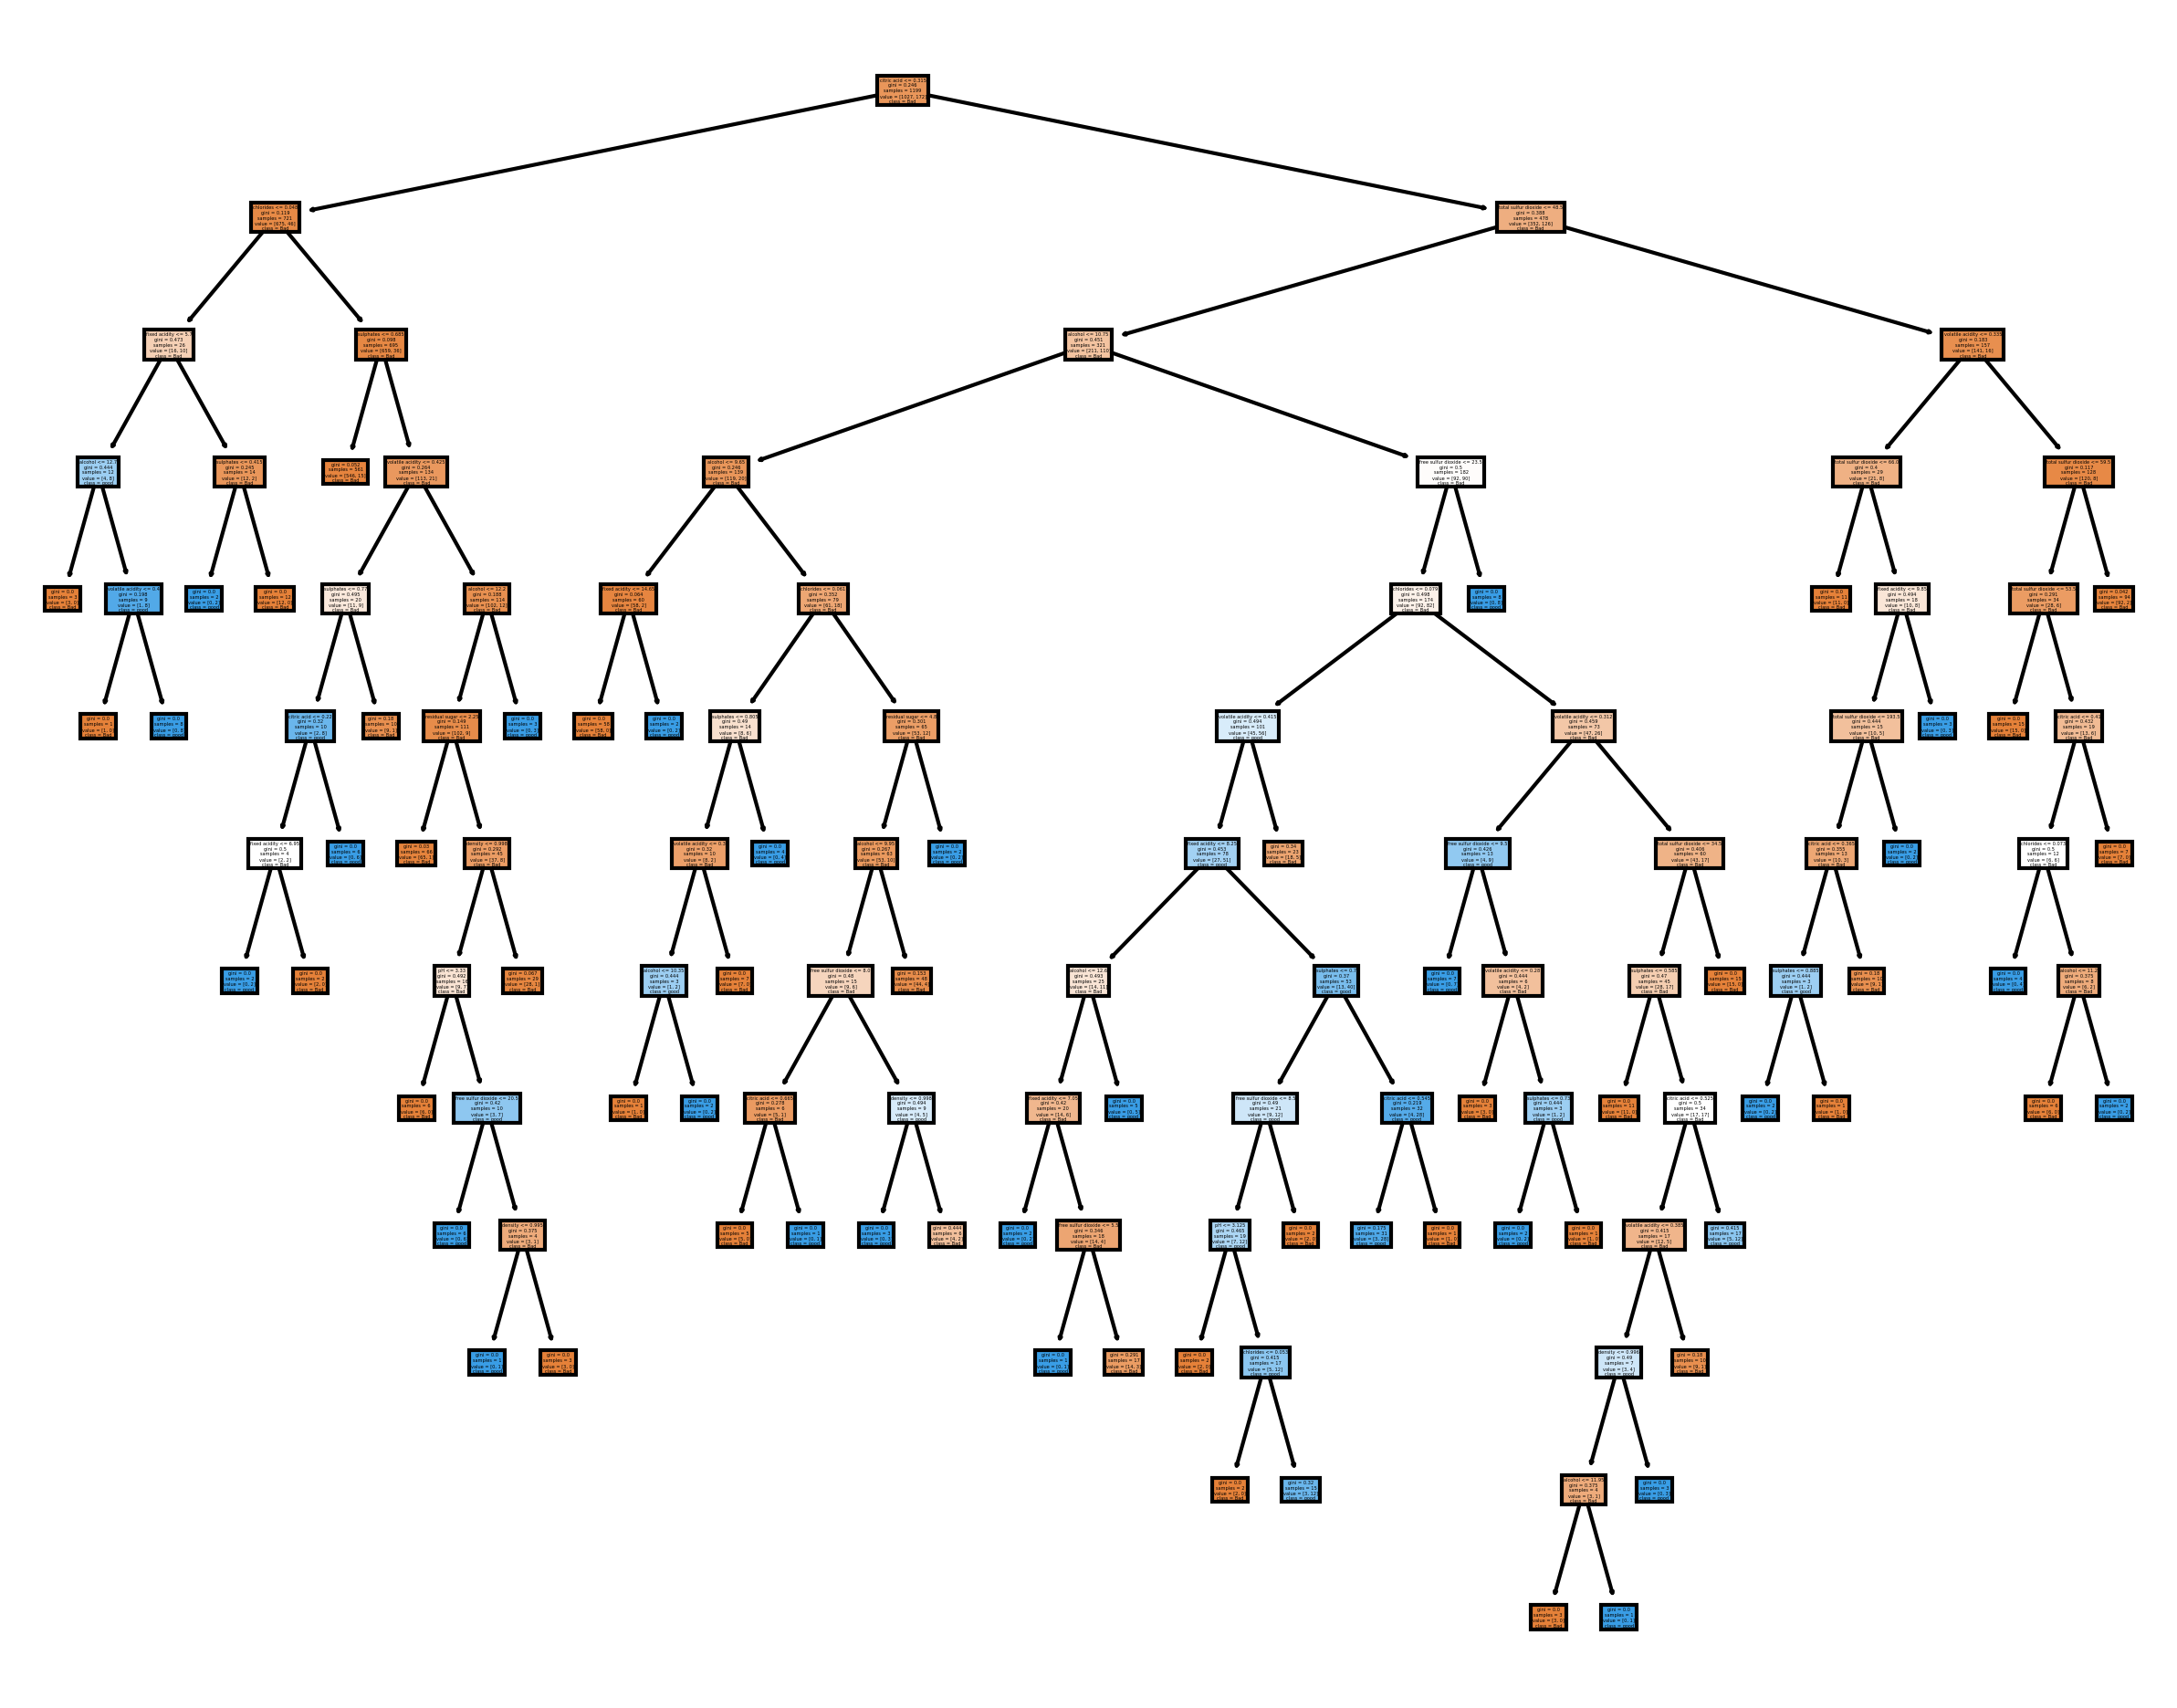

In [54]:
from sklearn import tree
df1=pd.DataFrame(df.drop(['quality'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Bad','good']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(fit_dt,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

In [55]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       355
           1       0.47      0.42      0.45        45

    accuracy                           0.88       400
   macro avg       0.70      0.68      0.69       400
weighted avg       0.88      0.88      0.88       400



In [56]:
print(accuracy_score(y_test,y_pred_dt))

0.8825


In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth=2), x_train, y_train, cv=5)
scores.mean()

0.8757426778242678

The accuracy obtained using Decision tree ML model is 88%.

# 3. Random Forest ML model using hyperparameter tuning

In [58]:
# instantiation
fit_rf = RandomForestClassifier()

In [59]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy'],
             'random_state':[0,1,2,3,4,5]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'random_state': 4}


In [60]:
#Finally the best parameters are specified

fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 4, random_state= 4 )

RandomForestClassifier(max_depth=4, max_features=None, random_state=4)

In [61]:
fit_rf.fit(x_train, y_train)
y_pred_rf = fit_rf.predict(x_test)

In [62]:
print(confusion_matrix(y_test,y_pred_rf))

[[342  13]
 [ 28  17]]


In [63]:
print(accuracy_score(y_test,y_pred_rf))

0.8975


In [64]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.57      0.38      0.45        45

    accuracy                           0.90       400
   macro avg       0.75      0.67      0.70       400
weighted avg       0.88      0.90      0.89       400



In [65]:
#  To crossvalidate the dataset

from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, x_train, y_train, cv=5)
scores.mean()

0.8799093444909344

The accuracy of Random forest ML model is 90%.

# 4. K-Nearest Neighbours ML model   

(As KNN is distance based model,so using scaled input data for prediction, X_train and Y_train)


In [66]:
knn = KNeighborsClassifier() 
# Providing the different values of hyperparameters
param_dist = {'n_neighbors': list(range(2,40)),
              }

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_knn = GridSearchCV(knn, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_knn.fit(X_train, Y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_knn.best_params_)

Best Parameters using grid search: 
 {'n_neighbors': 31}


In [67]:
#Finally using the optimum value of K = 31
knn = KNeighborsClassifier(n_neighbors = 31) 
knn.fit(X_train,Y_train)                           #fit
Y_pred_knn = knn.predict(X_test)                   #Predict

print(confusion_matrix(Y_test,Y_pred_knn))

[[343  12]
 [ 31  14]]


In [68]:
print(accuracy_score(Y_test,Y_pred_knn))

0.8925


In [69]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       355
           1       0.54      0.31      0.39        45

    accuracy                           0.89       400
   macro avg       0.73      0.64      0.67       400
weighted avg       0.87      0.89      0.88       400



In [70]:
accuracy_rate = []
for i in range(1,40):    # May take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_scale.iloc[:, df_scale.columns != 'quality_en'],df_scale['quality_en'],cv=10)
    accuracy_rate.append(score.mean())
    
#For different number of neighbors the model is run several times using FOR loop
# cross_val_score returns the accuracy score of all the 10 validations done since cv = 10
# In the Accuracy list the mean of all 10 scores is stored.

#Hence we have the mean accuracy score for each iteration.

Text(0, 0.5, 'Accuracy Rate')

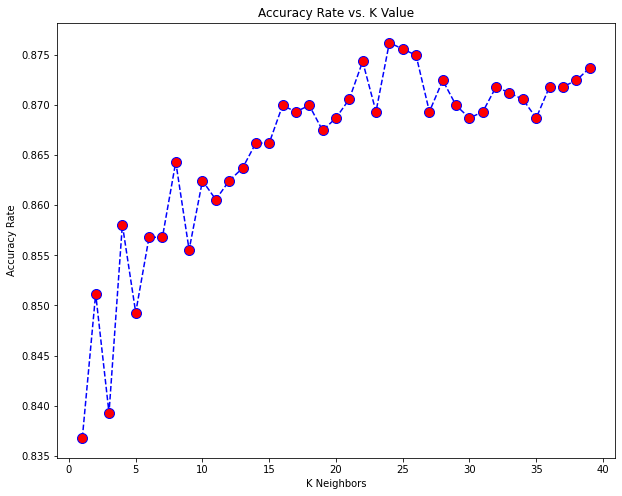

In [71]:
#Plotting the mean accuracy socre against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

The accuracy obtained using KNN ML model is 89%

# 5. Prediction using Naive Bayes ML model

In [72]:
# Instanstiation of the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

GaussianNB()

In [73]:
# Predict Output 
y_pred_nb = model.predict(x_test)
print(confusion_matrix(y_test, y_pred_nb))

[[298  57]
 [ 13  32]]


In [74]:
print(accuracy_score(y_test,y_pred_nb))

0.825


In [75]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       355
           1       0.36      0.71      0.48        45

    accuracy                           0.82       400
   macro avg       0.66      0.78      0.69       400
weighted avg       0.89      0.82      0.85       400



The accuracy obtained using Naive Bayes ML model is 82%.

# 6. Prediction using SVM ML model  

As model is distance based,using scaled data into the model

In [76]:
from sklearn.svm import SVC     #support Vector Classifier
                                #default kernel is rbf
svc = SVC(random_state = 5)
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)

In [82]:
print(confusion_matrix(Y_test,Y_pred_svc))

[[351   4]
 [ 32  13]]


In [83]:
print(accuracy_score(Y_test,Y_pred_svc))

0.91


In [84]:
print(classification_report(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       355
           1       0.76      0.29      0.42        45

    accuracy                           0.91       400
   macro avg       0.84      0.64      0.69       400
weighted avg       0.90      0.91      0.89       400



The accuracy of SVM ML model is 91%

As the multicollinearity of features affects the accuracy of models, hereby 
dropping the features which are multicollinear with respect to other features 
in dataset and also dropping the features which does not affect the target variable. 
observed the accuracy of Logistic regression Model as 90%. 

In [85]:
df_scale_M = df_scale.drop(['fixed acidity','density','residual sugar','free sulfur dioxide'],axis=1)
df_scale_M

,volatile acidity,citric acid,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality_en
0,0.72,-0.787879,-0.15,-0.100,1.052632,-0.333333,-0.5000,0
1,1.44,-0.787879,0.95,0.725,-0.578947,0.333333,-0.2500,0
2,0.96,-0.666667,0.65,0.400,-0.263158,0.166667,-0.2500,0
3,-0.96,0.909091,-0.20,0.550,-0.789474,-0.222222,-0.2500,0
4,0.72,-0.787879,-0.15,-0.100,1.052632,-0.333333,-0.5000,0
...,...,...,...,...,...,...,...,...
1594,0.32,-0.545455,0.55,0.150,0.736842,-0.222222,0.1875,0
1595,0.12,-0.484848,-0.85,0.325,1.105263,0.777778,0.6250,0
1596,-0.04,-0.393939,-0.15,0.050,0.578947,0.722222,0.5000,0
1597,0.50,-0.424242,-0.20,0.150,1.368421,0.500000,0.0000,0


In [86]:
X_M = df_scale_M.drop('quality_en',axis=1).values

In [87]:
Y_M = df_scale_M['quality_en'].values

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X_M,Y_M,test_size=0.25,random_state=0) 

In [89]:
# instanstiation of LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,Y_train) 
print(log_reg.fit(X_train,Y_train))

LogisticRegression(random_state=0)


In [90]:
Y_pred_LR=log_reg.predict(X_test)

In [91]:
# the confusion matrix shows the same format everytime: (TN , FP, FN , TP) with actuals 
# being the rows and predicted being the columns
conf_matrix = confusion_matrix(Y_test,Y_pred_LR)
conf_matrix      #Check   ()

array([[344,  11],
       [ 30,  15]], dtype=int64)

In [92]:
print("Accuracy: ",accuracy_score(Y_test,Y_pred_LR))   #  (TP + TN )/ Total  

Accuracy:  0.8975


In [93]:
print(classification_report(Y_test,Y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       355
           1       0.58      0.33      0.42        45

    accuracy                           0.90       400
   macro avg       0.75      0.65      0.68       400
weighted avg       0.88      0.90      0.89       400



The accuracy of Logistic Regression model improved from 89% to 90% after removing 
multicollinear features from data set

The accuracy observed from the different models for binary classification are as follows
1. Logistic regression model  - 89%
2. Decision tree model - 88%
3. Random forest model - 90%
4. KNN model           - 89%
5. Naive Bayes         - 87%
6. Support Vector ML   - 91%

Conclusion :1) It is already observed from the EDA, that the target variable 
'quality' of the dataset is imbalanced having multiple categories with majority 
classes(5,6) and minority classes(3,4,7,8) . This imbalance leads to improper 
training of the model,i.e, model is trained better with majority class than 
minority class. So, the model can predict the majority class accurately and 
fails to predict the minority class. This lead to major fall in the accuracy 
of all ML models. All ML models for target multiclassification recorded an 
accuracy around 63-71%. Among all the ML models for classification, Random forest
model recorded high accuracy of 70% than other models.
 
In order to increase the count of minority class in the target, divided the 
target classes 3,4,5,6,7,8 into two classes good and bad based on the wine 
quality ranking. 3,4,5,6 are designated with '0'(majority class) - Bad quality 
wine and 7, 8 are designated with '1'(minority class) good quaity wine. This 
lead to binary classification of target variable and also observed that the 
target is still imbalanced. But the count of minority class increased. This 
lead to increase in the accuracy of machine learning models to 89-91%. 
All the models unable to reach maximum accuracy due to imbalance target classes i.e, 
all the models can predict majority classes accurately and fails to predict minority classes.
Among all the ML models for classification, SVC ML model recorded high accuracy of
91% than other models.

2) Some of the features in the dataset, doesnot affect the target variable. 
The features which are multicollinear with(VIF > 5) and the features which does
not affect the target feature may be dropped  for  prediction of target variable.

3) Among the all the ML models, Random Forest and Support vector Classifier ML 
are best models for good prediction and accuracy.